# **Module 3: Linear Regression**

Linear regression models linear relationships of the form: 

$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + ... + \beta_n X_n $

Where Y is the response variable, the $X_n$ are predictor variables and the $\beta_n$ are the coefficients. 

Linear regression is the best choice of model when the following assumptions are met: 
- **Linearity:** the relationship between the response and predictor variables is linear
- **Independence & Normality of Errors:** observations are independent of each other and errors are normally distributed
- **No Multicollinearity:** the predictor variables are not highly correlated with each other 

It can still be useful when these assumptions are not perfectly met, but may no longer be the best choice of model. In this module we will cover some methods, such as variable transformation and model selection that can address deviations from these assumptions. 

In [19]:
# Import Packages 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

## Boston Housing Dataset

For this exercise we will be using the Boston Housing Dataset downloaded from https://github.com/selva86/datasets/blob/master/BostonHousing.csv.  

We will be attempting to predict medv based on the other variables. Therefore medv will be our **response variable** (also called y) and the other variables will be the **predictor variables**
(also referred to as x).

These are descriptions of the dataset columns:

CRIM - per capita crime rate by town\
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.\
INDUS - proportion of non-retail business acres per town.\
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\
NOX - nitric oxides concentration (parts per 10 million)\
RM - average number of rooms per dwelling\
AGE - proportion of owner-occupied units built prior to 1940\
DIS - weighted distances to five Boston employment centres\
RAD - index of accessibility to radial highways\
TAX - full-value property-tax rate per $10,000\
PTRATIO - pupil-teacher ratio by town\
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\
LSTAT - % lower status of the population\
MEDV - Median value of owner-occupied homes in $1000's\

In [20]:
# Read in housing dataset
housing_df = pd.read_csv("BostonHousing.csv")
housing_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## What Variables Will be Good Predictors
We could blindly run a model with all of the predictor variables, but first it is good to check which variable are correlated to the response.\
Predictors with no correlation to the response will not help our model. 

We will check correlation using the .corr() method which produces Pearson Correlation Coefficients.

In [21]:
#Look at the corelation matrix 
cor_matrix = housing_df.corr() #run correlation matrix
cor_matrix.style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1) #produce correlation matrix table with 

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


All of our variables have at least a weak correlation to medv, and may be helpful in predicting medv. \
Below we graph medv as a function of dis and see that even these variables with a relatively weak correlation (0.25) show a relationship. 

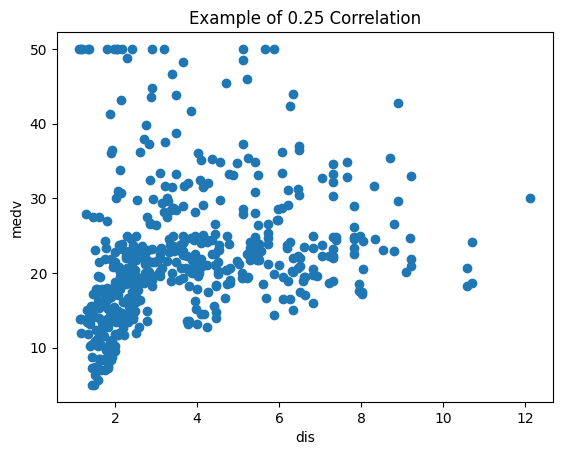

In [4]:
plt.scatter(housing_df["dis"], housing_df["medv"])
plt.xlabel("dis")
plt.ylabel("medv")
plt.title("Example of 0.25 Correlation")
plt.show()

## Normalizing Data
Linear regression will give the best predictions when all variables have normal distributions. This helps ensure linear relationships between the response and predictor variables. \
Medv is already, roughly normal, but some of the other variables are not.  \
Below we use various transformations to normalize the data. Natural logarithms and square root functions are common choices. 

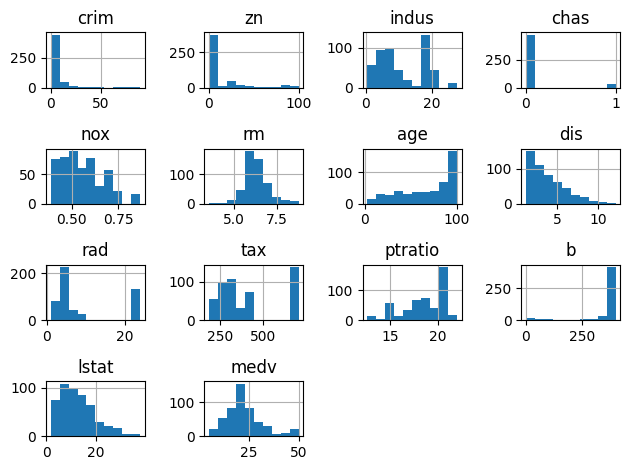

In [5]:
#Look at the Histograms 
housing_df.hist(bins = 10)
plt.tight_layout()
plt.show()

In [6]:
#variable transformations
transformed_df = housing_df
transformed_df["crim"] = transformed_df["crim"]**.1
transformed_df["zn"] = np.log(transformed_df["zn"]+1)    #This transformation didn't help
transformed_df["nox"] = transformed_df["nox"]**.3
transformed_df["age"] = (transformed_df["age"].max()-transformed_df["age"])
transformed_df["dis"] = transformed_df["dis"]**.4
transformed_df["lstat"] = transformed_df["lstat"]**.6


After applying transformations we look at the histograms again to see if our data is looking better. 

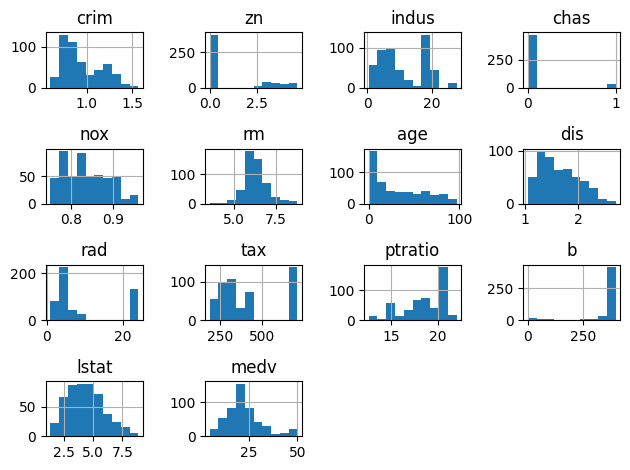

In [7]:
#Look at the Histograms 
transformed_df.hist(bins = 10)
plt.tight_layout()
plt.show()

With the exception of zn, chas, and b, the variables are roughly normal. \
Chas is a binary variable (0 or 1), so we do not worry about it being normal. 

## Perform Linear Regression Using statsmodels package

To perform linear regression we will first separate our predictor and response variables by making new dataframes x and y. \
Then we will fit the model using the statsmodels package. 

In [8]:
# Define x and y
y = transformed_df["medv"]
x = transformed_df.drop(["medv","zn","b"], axis=1)  #drop variables that could not be normalized 

In [9]:
# Add an intercept 
x_intercept = sm.add_constant(x)
# Fit the Model
model = sm.OLS(y, x_intercept).fit()
# Print the Model Summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     138.8
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          2.62e-143
Time:                        03:56:29   Log-Likelihood:                -1483.9
No. Observations:                 506   AIC:                             2992.
Df Residuals:                     494   BIC:                             3042.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         94.0198     10.115      9.295      0.0

## Model Summary & Model Selection
The model summary tells us about our model and how well it is performing. \
Of special interest is the $R^2$ value, the coefficients, P statistics, and the multicollinearity warning. 

### $R^2$
$R^2$ ranges from 0 to 1 and is a measure of how "good" our model is. It is the percentage of variance in y (the value we are predicting) explained by x (our predictor variables).\
So in this model, we can account for 76 % of the variability in medv by looking at the predictor variables (crim, indus, etc), but we cannot account for the other 24%. 

### Coefficients
The coef column lists the coefficients the model has assigned to each of the predictor variables. \From them we can build the model equation which is as follows (note that we have rounded to the nearest hundredth): 

$ medv = 97.15 - 3.05 * crim - 0.01*indus + 2.75*chas - 49.71*nox + 3.13*rm = 0.24*age-8.72*dis+0.27*rad-0.01*tax-0.95*ptratio $

The first variable listed, const, is not actually one of our predictors, but is what the model calls the intercept. \
The interpretation of the coefficients is that for each unit increase in the predictor variable, the response, y, is expected to increase by the amount of the coefficient. \
For example, for every unit increase in chas, medv will increase by 2.75.

### P values
The P>|t| column contains the p values. These tell us whether or not our predictor variables contributing significantly to the model. 
The literal interpretation of p is "the probability of observing the given coefficient, or one more extreme, if the predictor variable had no effect on the response."
In more simple phrasing, it is the probability that our predictor variable is useless in predicting the response. 

Generally, predictor variables are only considered "significant" if they have p values less that 0.05 (although 0.1 and other values are also used).\
We will remove crim, indus, and age from our model as they all have p values greater than 0.05.

### Multicollinearity
Note [2] warns that there might be strong multicollinearity. 
Multicollinearity occurs when two or more of the predictor variables are strongly correlated with each other, essentially measuring the same attribute. \
This causes a scenario where several very different models could all give similar predictions causing issues in interoperability.

For example, take predictors A and B which are strongly correlated with each other and positively correlated with the response such that either variable by itself would have a coefficient of around 80. In this case the models y = 40A + 40B, y = 1A + 79B, or even y = 90A - 10B might all be equally accurate, but each will have a very different interpretation. To avoid this, we often try to remove any multicollinearity. 

After removing the insignificant predictors, we will run a correlation matrix on the remaining variables to see which might be multicollinear. 

In [10]:
###### Drop insignificant predictors and rerun model #######
x2 = x.drop(["crim", "indus", "age"], axis = 1)

# Add an intercept 
x_intercept2 = sm.add_constant(x2)
# Fit the Model
model2 = sm.OLS(y, x_intercept2).fit()
# Print the Model Summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     191.5
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          1.81e-146
Time:                        03:56:29   Log-Likelihood:                -1484.4
No. Observations:                 506   AIC:                             2987.
Df Residuals:                     497   BIC:                             3025.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         92.1512      9.574      9.625      0.0

Despite removing three predictors, the $R^2$ of our model barely dropped. This means we have simplified our model without losing predictive power, yeah!!

Now we will go back and look at multicollinearity by generating a correlation matrix for our remaining predictors. 

In [11]:
cor_matrix2 = x2.corr() #run correlation matrix
cor_matrix2.style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1) #produce correlation matrix table with 

,chas,nox,rm,dis,rad,tax,ptratio,lstat
chas,1.000000,0.085246,0.091251,-0.092110,-0.007368,-0.035587,-0.121515,-0.059999
nox,0.085246,1.000000,-0.304126,-0.838668,0.622738,0.676927,0.218625,0.606879
rm,0.091251,-0.304126,1.000000,0.236209,-0.209847,-0.292048,-0.355501,-0.639000
dis,-0.092110,-0.838668,0.236209,1.000000,-0.538501,-0.590490,-0.239155,-0.539535
rad,-0.007368,0.622738,-0.209847,-0.538501,1.000000,0.910228,0.464741,0.487164
tax,-0.035587,0.676927,-0.292048,-0.590490,0.910228,1.000000,0.460853,0.546357
ptratio,-0.121515,0.218625,-0.355501,-0.239155,0.464741,0.460853,1.000000,0.397083
lstat,-0.059999,0.606879,-0.639000,-0.539535,0.487164,0.546357,0.397083,1.000000


We find two strong multicollinear pairs, dis & nox, and tax & rad. \
Hopefully we can exclude one of each of these pairs without losing major predictive power. 

In [12]:
###### Drop MultiColinear Variables and ReRun #######
x3 = x2.drop(["nox", "rad"], axis = 1)

# Add an intercept 
x_intercept3 = sm.add_constant(x3)
# Fit the Model
model3 = sm.OLS(y, x_intercept3).fit()
# Print the Model Summary
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     229.0
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          8.41e-140
Time:                        03:56:30   Log-Likelihood:                -1505.6
No. Observations:                 506   AIC:                             3025.
Df Residuals:                     499   BIC:                             3055.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.9166      4.366      8.914      0.0

## Using Our Model to Predict 

Now that we have selected a final model we want to use it to predict medv for new x values. \
The data we feed it will need to be in the same form as the x3 dataframe we used to train the model.\
We will also need to add an intercept to the data just as we did when training the model.

**Note:** you could also calculate points manually by using the coefficients to create the model equation

In [13]:
# Make an empty dataframe with the same columns as x3
new_x = pd.DataFrame(columns = x3.columns)

# Use .loc to add a row
new_x.loc[0] = [1, 5, 2, 400, 20, 7]

# Add constant/intercept
new_const = sm.add_constant(new_x)

# Make prediction
predictions = model3.predict(new_const)
print(predictions)

# Find confidence interval for prediction
#print(predictions.conf_int())

ValueError: shapes (1,6) and (7,) not aligned: 6 (dim 1) != 7 (dim 0)

In [45]:
x_intercept3.shape

(506, 7)

In [50]:
x3.shape

(506, 6)

In [22]:
new_const.shape

(1, 6)

In [23]:
new_x.shape

(1, 6)

In [ ]:
x3.describe()

,chas,rm,dis,tax,ptratio,lstat
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.069170,6.284634,1.646446,408.237154,18.455534,4.413638
std,0.253994,0.702617,0.360448,168.537116,2.164946,1.520828
min,0.000000,3.561000,1.049953,187.000000,12.600000,1.389401
25%,0.000000,5.885500,1.345557,279.000000,17.400000,3.200292
50%,0.000000,6.208500,1.593909,330.000000,19.050000,4.297608
75%,0.000000,6.623500,1.932017,666.000000,20.200000,5.464855
max,1.000000,8.780000,2.713277,711.000000,22.000000,8.864706
